# データ解析特論 2022年度水曜２限

# 第14回 その1 MLP で MNIST

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
from ipywidgets import IntProgress

## MNIST

`sklearn.datasets` の MNIST を使う．
解像度の小さいバージョンで学習がしやすいお手軽版．

1797


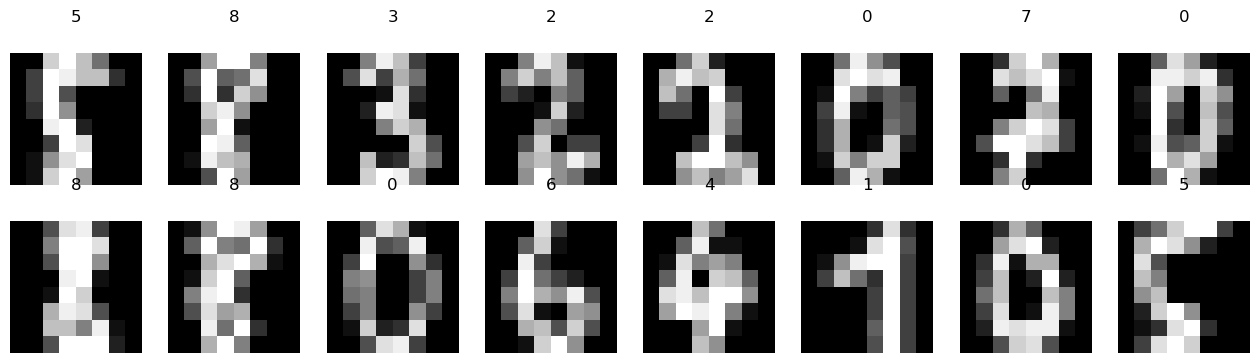

In [11]:
# MNIST データの読み込み
digits = datasets.load_digits()
#for i in digits:
#    print(i)

# サンプルサイズ
print(len(digits.images))

# ランダムでいくつか表示
ncols = 8
nrows = 2
fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=(2*ncols, 2*nrows))
for i in range(nrows):
    for j in range(ncols):
        n = np.random.randint(0, len(digits.images)-1)
        ax[i, j].matshow(digits.images[n], cmap='gray')
        ax[i, j].axis('off')
        ax[i, j].set_title('%d'%digits.target[n])

In [12]:
# 画像のラベル
digits.target_names


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

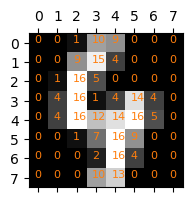

In [23]:
# 1枚の手書きデータ画像を表示
n_im = 111
fig, ax = plt.subplots(figsize=(2, 2))
ax.matshow(digits.images[n_im], cmap='gray')
# 1枚の手書きデータのピクセル値を表示
for i in range(8):
    for j in range(8):
        ax.text(j-0.2, i, '%d'%digits.data[n_im][8*i+j], c='tab:orange', fontsize=8)


各画像データは，横8つ，縦8つの計64ピクセルで与えられている．  
各ピクセルには輝度値（グレースケール値）が設定されていて，その濃淡で文字が表されている．  
各ピクセルには番号が振られていて，左上から順に 

$$
\begin{array}{|c|c|c|c|c|c|c|c|}
\hline
 0 &  1 &  2 &  3 &  4 &  5 &  6 &  7 \\\hline
 8 &  9 & 10 & 11 & 12 & 13 & 14 & 15 \\\hline
16 & 17 & 18 & 19 & 20 & 21 & 22 & 23 \\\hline
24 & 25 & 26 & 27 & 28 & 29 & 30 & 31 \\\hline
32 & 33 & 34 & 35 & 36 & 37 & 38 & 39 \\\hline
40 & 41 & 42 & 43 & 44 & 45 & 46 & 47 \\\hline
48 & 49 & 50 & 51 & 52 & 53 & 54 & 55 \\\hline
56 & 57 & 58 & 59 & 60 & 61 & 62 & 63 \\\hline
\end{array}
$$

と番地が振られている．これは 64 入力のデータである．

出力はアラビア数字 0 から 9 までの 10 種類なので，10値分類の問題となる．

In [26]:
# 画像データを配列に変換
X = digits.data
print(X.shape)

# 画像データのピクセル値の範囲を調べる
print(np.max(X), np.min(X))

# X の値域を [0,1] にしておく
X /= np.max(X)

# 画像データに対するラベル
Y = digits.target
print(Y.shape)

(1797, 64)
16.0 0.0
(1797,)


In [27]:
# train-test split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.333)

# 学習用データと検証用データのサイズを確認
print(Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape)

(1198, 64) (599, 64) (1198,) (599,)


## MLPClassifier で学習

In [30]:
max_iter = 1000

# MLPClassifier のインスタンス化
clf = MLPClassifier(alpha=0.0001, activation='relu', 
                   hidden_layer_sizes=(32, 16), max_iter=max_iter)

# fit
clf.fit(Xtrain, Ytrain)

# predict
YtrainP = clf.predict(Xtrain)
YtestP  = clf.predict(Xtest)

In [31]:
confusion_matrix(Ytest, YtestP)

array([[56,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 61,  0,  0,  0,  0,  0,  0,  1,  1],
       [ 0,  0, 56,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 61,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 66,  0,  0,  1,  0,  1],
       [ 0,  0,  0,  0,  0, 54,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  1, 62,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 65,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  1, 51,  0],
       [ 0,  1,  0,  1,  0,  0,  0,  0,  0, 54]])

In [32]:
clf?

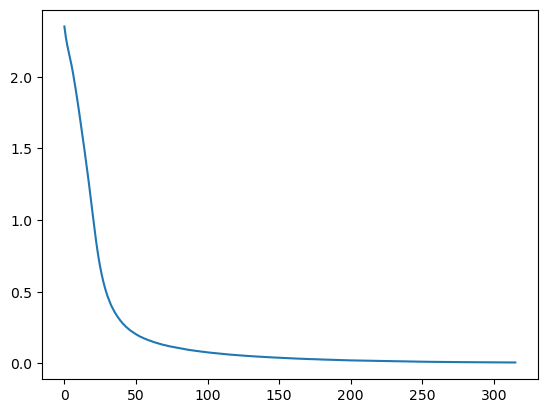

In [33]:
plt.plot(clf.loss_curve_)

In [36]:
MLPClassifier?

/Users/nn/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


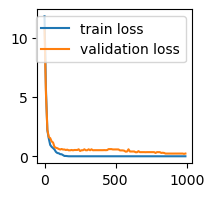

In [37]:
# test loss をプロットするために max_iater ごとに学習を止める
max_iter = 10

# 繰り返し回数 max_trial
max_trial = 100

# MLPClassifier を warm_start = True でインスタンス化
clf = MLPClassifier(alpha=0.0001, activation='relu', 
                   hidden_layer_sizes=(32, 16), max_iter=max_iter,
                   warm_start=True, tol=1e-16)

# 繰り返すごとに train_loss と valid_loss を格納するリスト
train_loss = []
valid_loss = []

# IntProgress で反復の経過を表示


for trial in range(max_trial):
    # fit して 学習データの predict を YtrainP
    YtrainP = clf.fit(Xtrain, Ytrain).predict(Xtrain)
    
    # テストデータの predict を YtestP
    YtestP = clf.predict(Xtest)
    
    # mean_squared_error
    train_loss.append(mean_squared_error(Ytrain, YtrainP))
    valid_loss.append(mean_squared_error(Ytest,  YtestP ))
    
# train_loss と test_loss の可視化
fig, ax = plt.subplots(figsize=(2, 2))
ax.plot(np.arange(0, max_trial*max_iter, max_iter), train_loss, label='train loss')
ax.plot(np.arange(0, max_trial*max_iter, max_iter), valid_loss, label='validation loss')
ax.legend()

## 学習結果の検証

## confusion matrix

In [38]:
print(confusion_matrix(Ytest, YtestP))

[[56  0  0  0  1  0  0  0  0  0]
 [ 0 63  0  0  0  0  0  0  0  0]
 [ 0  0 56  0  0  0  0  0  0  0]
 [ 0  0  1 61  0  0  0  0  0  0]
 [ 0  0  0  0 66  0  0  1  0  1]
 [ 0  0  0  1  0 53  0  0  0  1]
 [ 0  0  0  0  2  0 61  0  0  0]
 [ 0  0  0  0  0  0  0 65  0  0]
 [ 0  1  0  0  0  1  0  0 52  0]
 [ 0  0  0  0  0  0  0  0  1 55]]


### 表の見方

| | 分類器の予測は $0$ | $1$ | $2$ | $3$ | $4$ | $5$ | $6$ | $7$ | $8$ | $9$ |
|:---------------|---:|---:|---:|---:|---:|---:|---:|---:|---:|:--:|
| 真のラベルは $0$ | 49 | 0  | 0  | 1  | 0  | 0  | 0  | 0  | 0  | 0  |
| 真のラベルは $1$ | 0  | 59 | 0  | 0  | 1  | 0  | 0  | 0  | 0  | 0  |
| 真のラベルは $2$ | 0  | 0  | 59 | 0  | 0  | 0  | 0  | 0  | 0  | 0  |
| 真のラベルは $3$ | 0  | 0  | 0  | 68 | 0  | 0  | 0  | 0  | 2  | 0  |
| 真のラベルは $4$ | 0  | 0  | 0  | 0  | 51 | 0  | 1  | 0  | 0  | 1  |
| 真のラベルは $5$ | 0  | 0  | 0  | 0  | 1  | 61 | 1  | 0  | 0  | 2  |
| 真のラベルは $6$ | 0  | 1  | 0  | 0  | 1  | 0  | 62 | 0  | 0  | 0  |
| 真のラベルは $7$ | 0  | 0  | 0  | 0  | 0  | 0  | 0  | 72 | 1  | 1  |
| 真のラベルは $8$ | 0  | 2  | 0  | 3  | 0  | 0  | 0  | 0  | 42 | 0  |
| 真のラベルは $9$ | 0  | 0  | 0  | 0  | 0  | 0  | 0  | 0  | 1  | 51 |

というふうに表示されている．（上の表の値は例．分類器の設定によって上の値は変わり得る．）  
何がどう間違われたのかがわかりやすい．

例えば，真のラベルが $8$ のデータが $1$ や $3$ に間違って分類されている．$8$ が潰れて $1$ に見間違ったり，$8$ の左側が薄かったり潰れていたりすると $3$ と分類器は見間違うようだ．

### 適合率と再現率

**適合率 (precision)** は縦方向に和を取ったものが分母で，分子にはちょうど対角線上に乗っている値を用いる．  
つまり，ラベル $k$ の適合率とは， $k$ と分類されたサンプルのうち，正しく分類されたものの割合を表す．

**再現率 (recall)** は横方向に和を取ったものが分母で，分子は同じく対角線上に乗っている値を用いる．  
つまり，ラベル $k$ の再現率とは，真のラベルが $k$ のサンプルのうち，正しく分類されたものの割合を表す．

上の表の結果の場合，ラベル $0$ の適合率は  

$$\frac{49}{49+0+\ldots+0} = 1$$

であり，再現率は

$$\frac{49}{49+0+0+1+0+\ldots+0} = \frac{49}{50} = 0.98$$

となる．

## classification report

適合率や再現率を計算するには `classification_report` を用いると良い．

In [39]:
# classification report
print(classification_report(Ytest, YtestP))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        57
           1       0.98      1.00      0.99        63
           2       0.98      1.00      0.99        56
           3       0.98      0.98      0.98        62
           4       0.96      0.97      0.96        68
           5       0.98      0.96      0.97        55
           6       1.00      0.97      0.98        63
           7       0.98      1.00      0.99        65
           8       0.98      0.96      0.97        54
           9       0.96      0.98      0.97        56

    accuracy                           0.98       599
   macro avg       0.98      0.98      0.98       599
weighted avg       0.98      0.98      0.98       599



### report の見方

**$\mathrm F_1$ 値**は，適合率と再現率の調和平均である．すなわち，

$$
\mathrm F_1 = \frac1{\frac{\frac1{\mathrm{precision}}+\frac1{\mathrm{recall}}}2} = \frac{2\cdot\mathrm{precision}\cdot\mathrm{recall}}{\mathrm{precision}+\mathrm{recall}}
$$

つまり，逆数の算術平均の逆数である．

**support** はそれぞれのラベルのサンプルサイズである．

**macro avg** はマクロ平均のこと．  
* precision の macro avg は 0 から 9 の各 precision の10個の平均
* recall の macro avg は 0 から 9 の各 recall の10個の平均
* f1-score の macro avg は 0 から 9 の各 f1-score の10個の平均

**weighted avg** は適合度の重み付き平均のこと．  
macro avg は各ラベルの precision をサンプルサイズによらずに等価に扱っていたが，weighted avg では各ラベルのサンプルサイズで重み付き平均をとる．

**micro avg** はミクロ平均のこと．
分類器が，ラベルを問わず正しく分類できたサンプルサイズの割合．

### 各種計算式

各値の計算手法は，classification report が
$$
\begin{array}{rcccc}
   & \mbox{precision} & \mbox{recall} & \mbox{f1-socre} & \mbox{support} \\
 0 & p_0 & r_0 & f_0 & n_0 \\
 1 & p_1 & r_1 & f_1 & n_1 \\
 2 & p_2 & r_2 & f_2 & n_2 \\
 3 & p_3 & r_3 & f_3 & n_3 \\
 4 & p_4 & r_4 & f_4 & n_4 \\
 5 & p_5 & r_5 & f_5 & n_5 \\
 6 & p_6 & r_6 & f_6 & n_6 \\
 7 & p_7 & r_7 & f_7 & n_7 \\
 8 & p_8 & r_8 & f_8 & n_8 \\
 9 & p_9 & r_9 & f_9 & n_9 \\
 \\
 \mbox{micro avg} & m & m & m & N \\
 \mbox{macro avg} & M_p & M_r & M_f & N \\
 \mbox{weighted avg} & w_p & m & w_f & N
\end{array}
$$

と与えられているとすると，  micro avg は

$$
m = \frac{r_0 n_0 + r_1 n_1 + r_2 n_2 + \ldots + r_9 n_9}{n_0 + n_1 + n_2 + \ldots + n_9}
$$

となる．macro avg は

\begin{align}
& M_p = \frac{p_0 + p_1 + p_2 + \ldots + p_9}{10} \\[5pt]
& M_r = \frac{r_0 + r_1 + r_2 + \ldots + r_9}{10} \\[5pt]
& M_f = \frac{f_0 + f_1 + f_2 + \ldots + f_9}{10} 
\end{align}

となる．weighted avg は

\begin{align}
& w_p = \frac{p_0 n_0 + p_1 n_1 + p_2 n_2 + \ldots + p_9 n_9}{n_0 + n_1 + n_2 + \ldots + n_9} \\[5pt]
& w_f = \frac{f_0 n_0 + f_1 n_1 + f_2 n_2 + \ldots + f_9 n_9}{n_0 + n_1 + n_2 + \ldots + n_9}
\end{align}

となる．

## 課題14-1

1. MLPClassifier のパラメータをいろいろ変えてみて，どのようにしたら検証用のデータに対しても適合率が高くなるか試してみよう．
1. MLPClassifier を他の手法に変えるとどうなるか．手法やパラメータをとにかく色々試してみよう．

手法たち

- [sklearn.neural_network.MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)
- [skleran.tree.DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
- [sklearn.ensemble.RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
- [sklearn.ensemble.GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

clf = DecisionTreeClassifier()
#clf = RandomForestClassifier()
#clf = GradientBoostingClassifier()
clf.fit(Xtrain, Ytrain)

# 学習済みの分類器を用いて，交差検証を行う
YtestP = clf.predict(Xtest)

# confusion matrix を表示
print('Classification Report:')
print(classification_report(Ytest, YtestP, digits=4))

CM = confusion_matrix(Ytest, YtestP)
print(CM)

# あとは各自でやってみせよ

## 以上